In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from Table_and_Q import Table,Q_learning,box,pull_a,\
pull_b,pull_c,button_a,button_b,button_c,sample_table

from IPython.display import Image

## 解释这个游戏
### 点绿色按钮，选择行。如果选的行随机出了三个一样的数字，就赢了（那三个一样的数字加起来就是奖励）。不一样就输了（扣50）。刚开始自动配置1000的networth。玩40次或者networth跌到0以下，游戏就会初始化。

In [2]:
display(box)
button_a.on_click(pull_a)
button_b.on_click(pull_b)
button_c.on_click(pull_c)

you win -50 this time. your current networth is 950
   left  middle  right
a   3.0     3.0    8.0
b   7.0     1.0    1.0
c   3.0     3.0    3.0
player has choosen a wrong machine.


A Jupyter Widget

## 分析该怎么处理这个问题

In [3]:
sample_table()

,state_432,state_806,state_313,state_882,state_307
choose_a,0.661182,0.192378,0.383168,0.311632,0.523391
choose_b,0.499279,0.541934,0.974459,0.917062,0.048051
choose_c,0.110774,0.053772,0.528582,0.437570,0.178839


### 如果做出上边这个表（Q表），通过查表，我们就可以玩游戏玩得很好。注意：上表是没有训练的表，随机出来的值。

### 表里边的值，是通过每次玩的奖励或惩罚累计出来的。就像下图，狗听话了喂它东西吃，以后它都会听话一样。

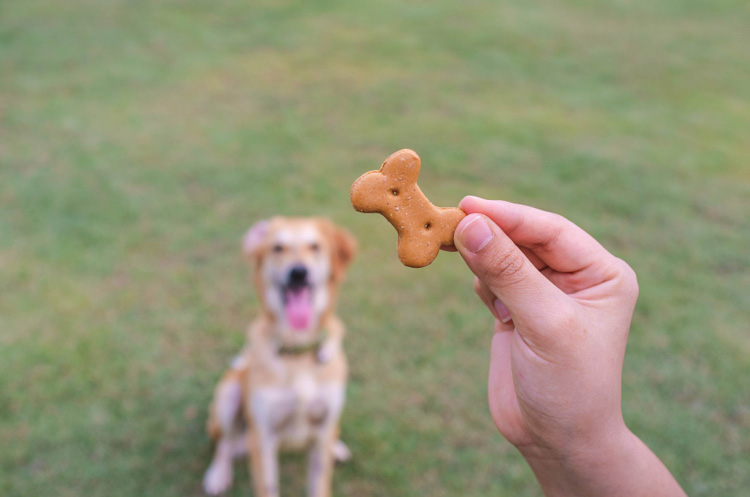

In [4]:
Image('animal_training_with_food.png')

### 下边是我们数字化的由Bellman大神提出的Q值公式。我们就是通过这个公式来更新Q值的。

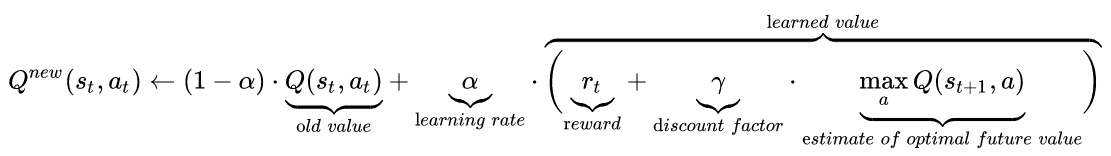

In [5]:
Image('q_function.png')

## 演示Q学习
### 感兴趣的可以读我的Table_and_q里边的代码，来了解我具体是怎么做的。

In [6]:
agent = Q_learning(learning_rate=0.1,epsilon=100,networth=1000)

### 没有训练的agent（代理，就是代替我们玩的）

In [7]:
agent.idiot_demo(40)

you win 21.0 this time. your current networth is 144.0
   left  middle  right
a   7.0     7.0    7.0
b   7.0     2.0    8.0
c   3.0     7.0    3.0
player has choosen the right machine.


### 正在训练的agent。

In [8]:
agent.train()

you win 15.0 this time. your current networth is 10000.0
   left  middle  right
a   1.0     7.0    5.0
b   5.0     5.0    5.0
c   4.0     2.0    7.0
player has choosen the right machine.
the agent is too good to play in this game


## agent的钱，随着它玩游戏的次数变多，在增加，说明我们的agent在学习。

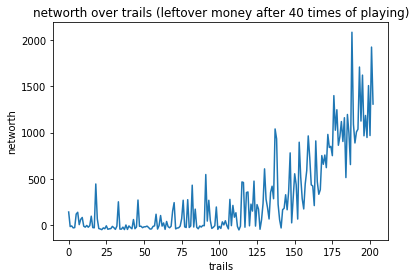

In [9]:
agent.draw_networth_hist()

### 训练好的agent

In [10]:
agent.master_demo(40)

you win 15.0 this time. your current networth is 1525.0
   left  middle  right
a   9.0     8.0    2.0
b   9.0     8.0    2.0
c   5.0     5.0    5.0
player has choosen the right machine.


### 训练好的Q表。注意：这里我用的python字典，因为更方便我的程序创建和查找。
#### 里边每个键就是状态的名字，后边就是对应的选择以及得分（后边有解释）。

In [21]:
for l in list(agent.Q_table.keys())[:5]:
    print(l,agent.Q_table[l])

873 {'c': -5.0, 'a': -255.81044999999997, 'b': 12072.172128947877}
379 {'b': -14.5, 'a': -1.5799999999999998, 'c': 292.36509321000005}
386 {'a': 0, 'c': 472.6706625359999, 'b': -5.0}
443 {'b': -4368.655458782001, 'a': -6466.125494345501}
233 {'a': 189013.91836777667, 'b': -491.039855, 'c': -32.55}


## 解释强化学习

仿生学算法之一。训练狗的方法训练机器。训练依赖代理（agent）来代替人去玩游戏。agent在碰到不同的Environment（环境）可以选择不同的Action（行为），相应的会得到不同的奖励（Reward）。我们有不同的算法（Q或者TD）来使agent变聪明。亦即在玩的过程中学的Value（值）或者Policy（策略）就是强化学习训练的结果。有了Value（Q学习里的Q值是Value的变换）或者Policy，代理就可以很好的玩游戏了。超过人的能力（AlphaGo）。

## 解释序列决策与MDP

一般的游戏，每一步对以后的游戏是有影响的，所以代理学习的决策是序列性的决策。Markov Decision Process，有序列就离不开[Markov Chain](https://en.wikipedia.org/wiki/Markov_chain)的假设：$P_t$ 的概率仅受 $p_{t-1}$ 影响，与 $p_{t-2} $没有关系。这个规则对应决策的影响就是Markov Decision Process（MDP）。

## 解释深度学习对强化学习的改善

我们这个游戏里边的状态空间很大 $9*9*9$ ，还需要乘以3有2187中情况，agent需要遇到至少1次。这还是比较容易的游戏或问题。像围棋有 $3^361$ 种情况（比宇宙中的原子数量还有多），是不可能全部遍历的。然而深度学习能把数据转换（找pattern、找特征），使问题状态空间‘变小’。这样强化学习就能够处理状态空间特别大的情况。这就是深度学习对强化学习的主要帮助（在种情况下的强化学习就是model based reinforcement learning，记得吗？我做的这个是model free reinforcement learning)。

## 常用强化学习算法

1. 比较常用的算法是Q学习，本次示范是一个model_free的Q学习。意思是Q值更新来源于每次迭代的奖惩，而没有使用一些模型来估计这个Q值。

2. 另外一种常用的算法是Temporal Difference （TD）学习。在我看来就是把Q学习公式[Bellman](https://en.wikipedia.org/wiki/Richard_E._Bellman) 的发明。每个状态对应的是胜算，胜算由[Monty Carlo Tree Search](https://en.wikipedia.org/wiki/Monte_Carlo_tree_search)决定。

3. actor critic算法（目前的理解）是在常用的强化学习算法上又加入了一个判别者模型，它来判别代理（agent）每次走的好不好。